#Загрузим библиотеки для анализа датасета

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем датасет

In [3]:
df = pd.read_csv('/content/retail_sales_dataset.csv')

#Проводим исследовательский анализ

In [4]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Вывод: датасет готов для исследовательского анализа, нулевых значений нет

Рассмотрим метрики для определения нормальности датасета, датасет готов к анализу

In [6]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


<Axes: >

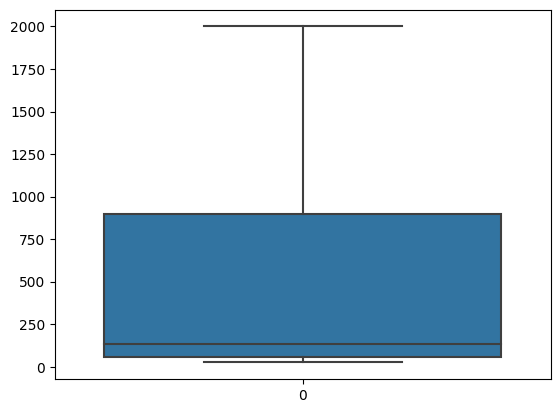

In [7]:
sns.boxplot(df['Total Amount'])

В датасете выбросов нет

Перейдем к исследовательскому анализу

In [8]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


Перейдем к метрике DAU (Daily Active Users)

In [9]:
DAU = df[['Date','Customer ID']].groupby(by = 'Date').count()

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month

In [11]:
MAU = df[['month','Customer ID']].groupby(by = 'month').count()

<Axes: title={'center': 'MAU'}, xlabel='month'>

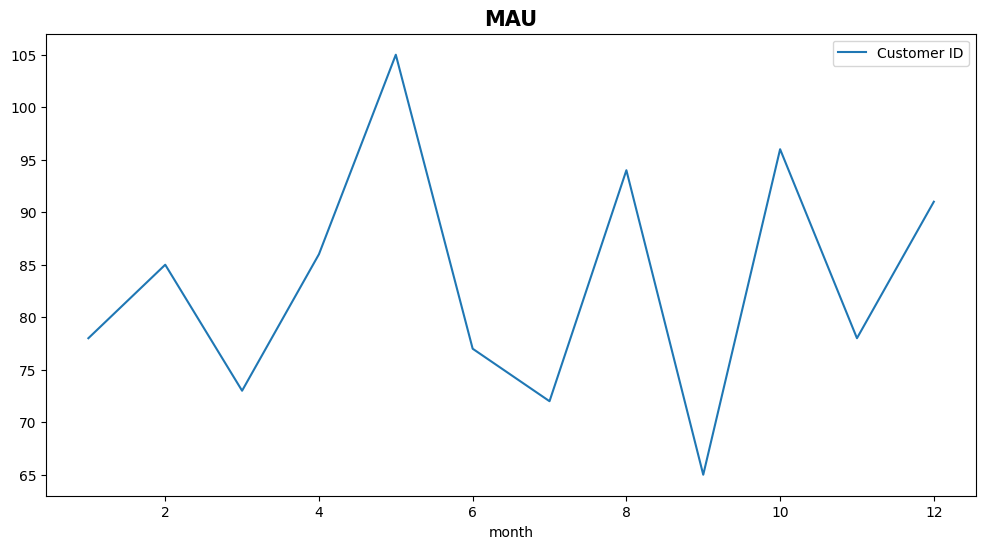

In [12]:
plt.figure(figsize = (12,6))
plt.title('MAU', size = 15, weight = 'heavy')
sns.lineplot(MAU)

Мы видим что пик продаж приходится на 5 месяц (май) и сильно снизились продаже в 9 месяце (сентябрь)

Посмотрим таблицу продаж в 9 месяце

In [13]:
september_sales = df[df['month'] == 9]

In [14]:
september_sales

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,month
18,19,2023-09-16,CUST019,Female,62,Clothing,2,25,50,9
112,113,2023-09-13,CUST113,Female,41,Electronics,2,25,50,9
130,131,2023-09-18,CUST131,Female,21,Beauty,2,300,600,9
131,132,2023-09-10,CUST132,Male,42,Electronics,4,50,200,9
146,147,2023-09-28,CUST147,Male,23,Electronics,1,300,300,9
...,...,...,...,...,...,...,...,...,...,...
918,919,2023-09-09,CUST919,Female,22,Beauty,2,25,50,9
924,925,2023-09-03,CUST925,Male,25,Electronics,1,300,300,9
930,931,2023-09-02,CUST931,Male,30,Beauty,4,30,120,9
934,935,2023-09-09,CUST935,Female,34,Beauty,1,50,50,9


In [15]:
sales_per_month = df[['month','Quantity']].groupby (by = 'month', as_index = False).sum()

<Axes: xlabel='month', ylabel='Quantity'>

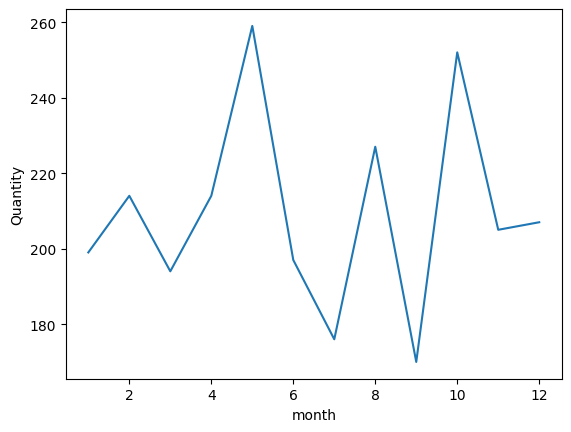

In [16]:
sns.lineplot(sales_per_month, x = 'month', y= 'Quantity')

Видим в 9 месяце упало количество продаваемых товаров, соответственно снизилась выручка

Если мы видим что продажи снижаются в какой-то период, можем предложить клиентам акцию, например 1+1 (покупаешь один товар, 1 товар в подарок)

Попробуем уменьшить цену продаваемых нами товаров, чтобы увеличить количество продаваемых товаров

In [17]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5


Сколько в среднем и медиана тратит мужчина и женщина, средний возраст покупателей мужчин и женщин, какие категории товаров покупают чаще всего (топ 5), топ 5 самых непродаваемых товаров количество мужчин и женщин по месяцам, какой товар предпочитают женщины, какой товар приобретают мужчины

Расчитаем сколько в среднем и медиана тратит мужчина и женщина

In [18]:
df[['Gender','Total Amount']].groupby (by = 'Gender').mean()

,Total Amount
Gender,
Female,456.549020
Male,455.428571


In [27]:
df[['Gender','Total Amount']].groupby (by = 'Gender').median()

,Total Amount
Gender,
Female,150.0
Male,120.0


In [31]:
df[['Gender','Total Amount']].groupby (by = 'Gender').quantile(0.51)

,Total Amount
Gender,
Female,150.0
Male,150.0


Вывод: в среднем мужчины и женщины тратят одиннаково

Расчитаем средний возраст покупателей мужчин и женщин

In [19]:
df[['Age', 'Gender']].groupby(by = ['Gender']).mean()

,Age
Gender,
Female,41.356863
Male,41.428571


In [32]:
df[['Age', 'Gender']].groupby(by = ['Gender']).median()

,Age
Gender,
Female,42.0
Male,42.0


In [34]:
df[['Age', 'Gender']].groupby(by = ['Gender']).quantile(0.75)

,Age
Gender,
Female,52.75
Male,54.00


Вывод: Средний возраст покупателей среди мужчин и женщин одиннаков

**Посмотрим какие категории товаров покупают чаще всего (топ 5)**

In [20]:
product_category = df[['Product Category', 'Quantity']].groupby(by = 'Product Category').sum()
product_category.sort_values(by = 'Quantity', ascending = False)

,Quantity
Product Category,
Clothing,894
Electronics,849
Beauty,771


Наиболее продаваемая категория товаров одежда

**Посмотрим топ 5 самых непродаваемых товаров**

In [21]:
product_category.sort_values(by = 'Quantity', ascending = True)

,Quantity
Product Category,
Beauty,771
Electronics,849
Clothing,894


Вывод: наиболее непродаваемый товар косметика

**Посмотрим количество мужчин и женщин по месяцам**

In [39]:
male_female_month = df[['month', 'Gender','Transaction ID']].groupby (by = ['month', 'Gender'], as_index = False)['Transaction ID'].count()
male_female_month

,month,Gender,Transaction ID
0,1,Female,40
1,1,Male,38
2,2,Female,36
3,2,Male,49
4,3,Female,41
5,3,Male,32
6,4,Female,50
7,4,Male,36
8,5,Female,45
9,5,Male,60


<Axes: title={'center': 'Male female month sales'}, xlabel='month', ylabel='Transaction ID'>

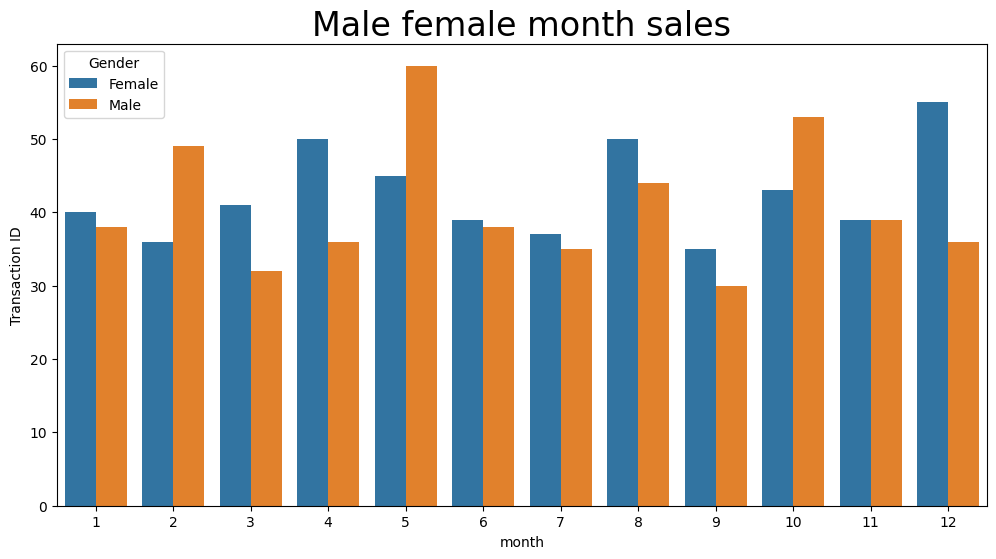

In [44]:
plt.figure(figsize = (12,6))
plt.title('Male female month sales', size = 24)
sns.barplot(male_female_month, x = 'month', y = 'Transaction ID', hue='Gender')

Вывод: можем сказать, что есть зависимость между месяцем и количеством покупок (14 февраля), в зависимости от праздника наши клиенты могут покупать больше или меньше товаров

**Посмотрим на количество покупок мужчин и женщин в зависимости от категории товаров**

In [24]:
Gender_product_category = df[['Gender','Quantity','Product Category']].groupby (by = ['Gender', 'Product Category']).sum()
Gender_product_category.sort_values(by = ['Gender','Quantity'], ascending = False)

Quantity
Gender Product Category          
Male   Clothing               453
       Electronics            410
       Beauty                 353
Female Clothing               441
       Electronics            439
       Beauty                 418

Вывод: покупки по категориям никак не отличаются друг от друга